In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
hr = pd.read_csv('E:\\2024\\HR_DataSet.csv')

In [3]:
hr.duplicated().any()

True

In [3]:
hr = hr.drop_duplicates()

In [9]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
hr.shape

(11991, 10)

In [11]:
hr.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [12]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
satisfaction_level       11991 non-null float64
last_evaluation          11991 non-null float64
number_project           11991 non-null int64
average_montly_hours     11991 non-null int64
time_spend_company       11991 non-null int64
Work_accident            11991 non-null int64
left                     11991 non-null int64
promotion_last_5years    11991 non-null int64
Department               11991 non-null object
salary                   11991 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [5]:
X = hr.drop('left', axis=1)
y = hr.left

### Create dummy variables 

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [16]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
y.value_counts()

0    10000
1     1991
Name: left, dtype: int64

#### Split the data into train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Evaluating the Model

In [30]:
accuracy = accuracy_score(y_test,y_pred)

In [33]:
print('Accuracy: ', round(accuracy,2))

Accuracy:  0.97


In [34]:
print('Confusion Matrix: ', confusion_matrix(y_test,y_pred))

Confusion Matrix:  [[3224   72]
 [  55  607]]


In [35]:
print('Classification Report: ', classification_report(y_test,y_pred))

Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98      3296
           1       0.89      0.92      0.91       662

    accuracy                           0.97      3958
   macro avg       0.94      0.95      0.94      3958
weighted avg       0.97      0.97      0.97      3958



In [44]:
clf = DecisionTreeClassifier(max_leaf_nodes=7, random_state=0)

In [40]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [41]:
X_train.shape

(8033, 18)

In [42]:
y_train.value_counts()

0    6704
1    1329
Name: left, dtype: int64

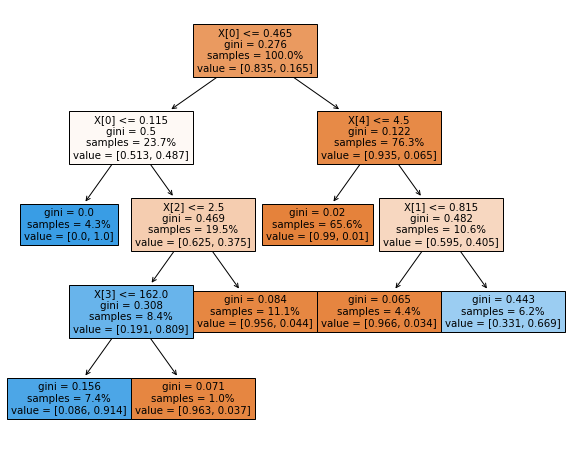

In [45]:
plt.figure(figsize=(10,8))
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True, proportion=True)
plt.show()

In [47]:
# Getting the feature importance (Important Variables)
importance = clf.feature_importances_
feature_names = X.columns
# Create a dataframe to display the important variables
feature_importance = pd.DataFrame({'Feature':feature_names, 'Imporance':importance})
feature_importance

,Feature,Imporance
0,satisfaction_level,0.435053
1,last_evaluation,0.098936
2,number_project,0.265839
3,average_montly_hours,0.064824
4,time_spend_company,0.135349
5,Work_accident,0.000000
6,promotion_last_5years,0.000000
7,Department_RandD,0.000000
8,Department_accounting,0.000000
9,Department_hr,0.000000


In [48]:
feature_importance = feature_importance.sort_values('Imporance', ascending=False)
feature_importance

,Feature,Imporance
0,satisfaction_level,0.435053
2,number_project,0.265839
4,time_spend_company,0.135349
1,last_evaluation,0.098936
3,average_montly_hours,0.064824
11,Department_marketing,0.000000
16,salary_low,0.000000
15,Department_technical,0.000000
14,Department_support,0.000000
13,Department_sales,0.000000


In [50]:
feature_importance[0:5]

,Feature,Imporance
0,satisfaction_level,0.435053
2,number_project,0.265839
4,time_spend_company,0.135349
1,last_evaluation,0.098936
3,average_montly_hours,0.064824


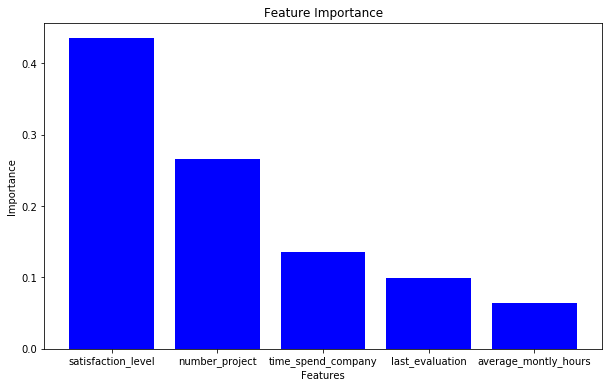

In [53]:
plt.figure(figsize=(10,6))
plt.bar(feature_importance[0:5]['Feature'], feature_importance[0:5]['Imporance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Campaign Data

In [17]:
camp = pd.read_csv('E:\\Christ\\2021\\Dataset\\Campaign_Data.csv')

In [55]:
list(camp)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'response']

In [56]:
camp['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

In [18]:
camp['response'] = camp['response'].replace({'yes':1, 'no':0})

In [62]:
camp.response.value_counts()

0    36548
1     4640
Name: response, dtype: int64

In [58]:
X = camp.drop('response', axis=1)
y = camp['response']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

### Evaluate the Model

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

print('Classification Report: ', classification_report(y_test, y_pred))

print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))


Accuracy:  0.8908997278010741
Classification Report:                precision    recall  f1-score   support

           0       0.94      0.94      0.94     12056
           1       0.52      0.53      0.53      1537

    accuracy                           0.89     13593
   macro avg       0.73      0.74      0.73     13593
weighted avg       0.89      0.89      0.89     13593

Confusion Matrix:  [[11288   768]
 [  715   822]]


In [67]:
X_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_s

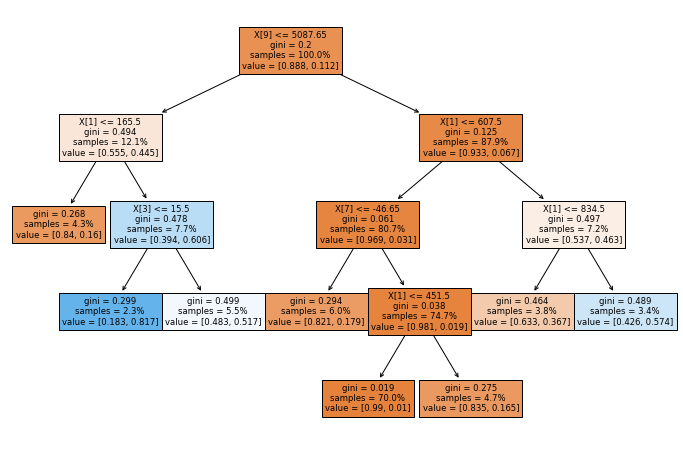

In [69]:
plt.figure(figsize=(12,8))
clf = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True, proportion=True)
plt.show()

In [75]:
# Getting the feature importance (Important Variables)
importance = clf.feature_importances_
feature_names = X.columns
# Create a dataframe to display the important variables
feature_importance = pd.DataFrame({'Feature':feature_names, 'Importance':importance})
feature_importance.sort_values('Importance',ascending=False, inplace=True)

In [76]:
feature_importance

,Feature,Importance
1,duration,0.521057
9,nr.employed,0.403036
3,pdays,0.038291
7,cons.conf.idx,0.037617
0,age,0.000000
40,month_jul,0.000000
31,default_unknown,0.000000
32,default_yes,0.000000
33,housing_unknown,0.000000
34,housing_yes,0.000000


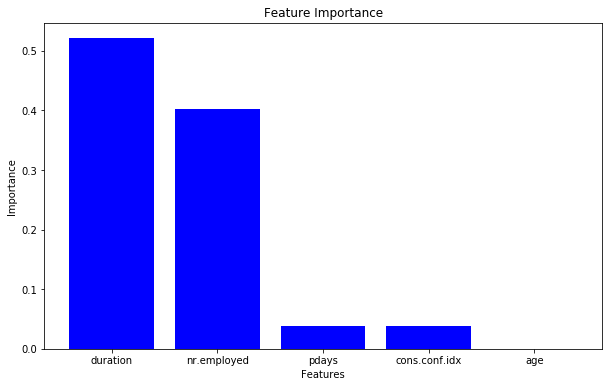

In [78]:
plt.figure(figsize=(10,6))
plt.bar(feature_importance[0:5]['Feature'], feature_importance[0:5]['Importance'], color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

## RANDOM FOREST

### HR Dataset

In [14]:
X = hr.drop('left', axis=1)
y = hr.left

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Initialise the Random Forest Calssifier

In [15]:
clf = RandomForestClassifier(n_estimators=100,random_state=20 )

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

##### Evaluate the model

In [16]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Confustion Matrix: ', conf_matrix)
print('Classification Report: ', class_report)

Accuracy:  0.9813036887316827
Confustion Matrix:  [[3283   13]
 [  61  601]]
Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      3296
           1       0.98      0.91      0.94       662

    accuracy                           0.98      3958
   macro avg       0.98      0.95      0.97      3958
weighted avg       0.98      0.98      0.98      3958



In [ ]:
# Results of Decision tree
# 1       0.89      0.92      0.91

#### Campaign Dataset

In [19]:
camp = pd.read_csv('E:\\Christ\\2021\\Dataset\\Campaign_Data.csv')
camp['response'] = camp['response'].replace({'yes':1, 'no':0})
X = camp.drop('response', axis=1)
y = camp['response']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Initialise the Random Forest Calssifier

In [20]:
clf = RandomForestClassifier(n_estimators=100,random_state=20 )

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

##### Evaluate the model

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy: ', accuracy)
print('Confustion Matrix: ', conf_matrix)
print('Classification Report: ', class_report)

Accuracy:  0.9128963437063194
Confustion Matrix:  [[11685   371]
 [  813   724]]
Classification Report:                precision    recall  f1-score   support

           0       0.93      0.97      0.95     12056
           1       0.66      0.47      0.55      1537

    accuracy                           0.91     13593
   macro avg       0.80      0.72      0.75     13593
weighted avg       0.90      0.91      0.91     13593



In [ ]:
# Results of decision tree
# 1       0.52      0.53      0.53 